In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1:

Your goal is to minimize the following loss function

$
L(\beta_0, \beta_1)=
(\beta_0-3)^2 + 2.4(\beta_1-5)^2 + 10
$

Using the following specification, find $\beta_0, \beta_1$ which minimize the loss function.

### Instruction:

* Start with initial values $\beta_0=7.0$ and $\beta_1=3.0$.

* Run the gradient descent algorithm for proper amount of iterations and track the loss values at each step. Plot the learning curve to see whether the learning is enoughly done.

In [2]:
def loss_ft(x1, x2):
    return (x1-3)**2 + 2.4*(x2-5)**2 + 10

beta = torch.tensor([7.0, 3.0], requires_grad=True)
lr = 0.1
epoch = 100
# beta값과 loss값을 담을 리스트
beta_list = []
loss_list = []

# 적절한 반복값을 찾기 위해 while문 사용
while True:
    loss = loss_ft(beta[0], beta[1])
    beta_list.append([beta.data.numpy()[0], beta.data.numpy()[1]])
    loss_list.append(loss.item())

    beta.grad = None # 기울기 계산한 값이 누적되지 않게 비워줌
    loss.backward()
    beta.data -= lr*beta.grad # beta값 업데이트
    epoch -= 1

    # 적절한 반복값을 찾는 기준: 기울기 변화가 0.001 미만 -> 더 이상 반복해도 큰 변화가 없을 것으로 판단
    # 지정한 epoch만큼 반복하거나, 기울기 변화가 0.001 미만일 경우 반복을 종료한다.
    if epoch == 0 or np.all(np.abs(beta.grad.numpy()) < 0.001):
        break

# 마지막 결과 저장
beta_list.append(beta.data.numpy())
loss_list.append(loss.item())

# beta와 loss값들을 history dataframe으로 만들기
history = pd.DataFrame()
history['beta'] = beta_list
history['loss'] = loss_list

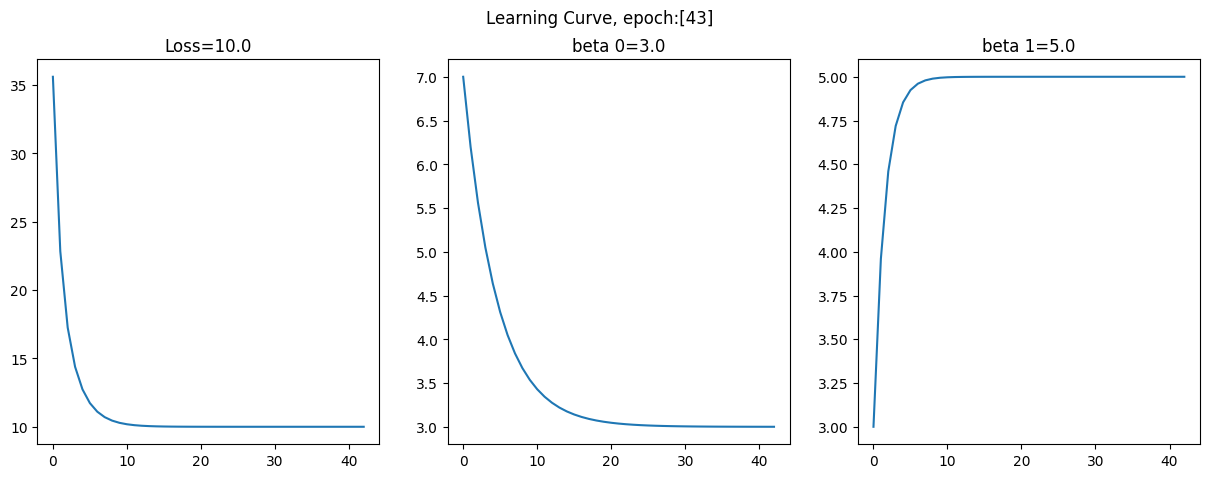

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), squeeze=False)
plt.suptitle(f'Learning Curve, epoch:[{len(history)}]')

axs[0,0].plot(history['loss'])
axs[0,0].set_title(f'Loss={round(history.iloc[-1,1], 3)}')

axs[0,1].plot(history['beta'].apply(lambda x: x[0]))
axs[0,1].set_title(f'beta 0={round(history.iloc[-1,0][0], 3)}')

axs[0,2].plot(history['beta'].apply(lambda x: x[1]))
axs[0,2].set_title(f'beta 1={round(history.iloc[-1,0][1], 3)}')

plt.show()

- 적절한 iteration 횟수를 찾기 위해 기울기가 0.001 미만인 경우 수렴되었다고 보고 반복을 종료하였다. 이 조건에 따르면 적절한 반복 횟수는 43회이다.
- Learing curve로 loss, beta0, beta1의 변화를 선택하였다.
- loss는 10으로, beta0는 3으로, beta1는 5로 수렴하는 것을 볼 수 있다.


## Problem 2:

You are given a dataset with two input features
$
X_1$
  and
$X_2$​ , and an output
$Y$. Your task is to fit a linear regression model using gradient descent to predict $Y$ based on
$X_1$ and $X_2$.

The model can be represented as:

$
Y=\beta_0 + \beta_1X_1 +\beta_2 X_2.
$

The goal is to minimize the mean squared error between the predicted values $\widehat{Y}$ and the true values $Y$.

Your dataset is given by

```
X1 = torch.tensor([0.83, -0.18,  0.27,  0.32,  0.25, -0.73,  0.19, -0.08, -0.47, -0.28, -0.23,  0.25, 0.15,  0.92,  1.27, -0.50,  0.05, -0.74, -0.06,  0.70])
X2 = torch.tensor([0.63, -1.43, -1.35,  0.70, -1.48,  0.06,  1.14,  0.96, -1.65,  0.44,  0.62,  0.47, -0.08,  1.03,  1.24, -0.54,  0.08,  0.85, -1.53,  0.66])
Y = torch.tensor([0.50, 1.34, 1.39, 0.40, 1.20, 0.11, -0.21, -0.26, 1.18, 0.59, 0.13, 0.17, 0.55, 0.32, 0.19, 0.46, 0.32, -0.35, 1.35, 0.20])

```

The following is the step-by-step instruction. Complete the code.

In [4]:
X1 = torch.tensor([0.83, -0.18,  0.27,  0.32,  0.25, -0.73,  0.19, -0.08, -0.47, -0.28,
                   -0.23,  0.25, 0.15,  0.92,  1.27, -0.50,  0.05, -0.74, -0.06,  0.70])
X2 = torch.tensor([0.63, -1.43, -1.35,  0.70, -1.48,  0.06,  1.14,  0.96, -1.65,  0.44,
                   0.62,  0.47, -0.08,  1.03,  1.24, -0.54,  0.08,  0.85, -1.53,  0.66])
Y = torch.tensor([0.50, 1.34, 1.39, 0.40, 1.20, 0.11, -0.21, -0.26, 1.18, 0.59,
                  0.13, 0.17, 0.55, 0.32, 0.19, 0.46, 0.32, -0.35, 1.35, 0.20])

### Step 1: Reshape the Data

* Combine $X_1$ and $X_2$ into a single tensor $X$ of shape $[n,3]$ where each row is a pair $(1, X_1[i], X_2[i])$ where we have added a column of ones to account for $\beta_0$.

```
ones = torch.ones((**a**))
```

In [5]:
ones = torch.ones(X1.shape)
X = torch.stack([ones, X1, X2], dim=1)
X.shape

torch.Size([20, 3])

### Step 2: Initialize the Parameters

* Define $\beta = [\beta_0, \beta_1, \beta_2]$ as a tensor with `requires_grad=True` so that PyTorch can compute gradients.

* For convenience, you initialize $\beta=[0.1, -0.035, 0.12]$.

```
beta = torch.tensor((**b**))
```

In [6]:
beta = torch.tensor([[0.1], [-0.035], [0.12]], requires_grad=True)
beta

tensor([[ 0.1000],
        [-0.0350],
        [ 0.1200]], requires_grad=True)

### Step 3: Define the Prediction Function

* The model prediction $\widehat{Y}$ can be computer as `X@beta`.

```
def predict(X, beta)
   return (**c**)
```

In [7]:
def predict(X, beta):
    return X@beta

### Step 4: Define the Loss Function

* Use the Mean Squared Error (MSE) loss:

$MSE = \frac{1}{n}\sum(Y-\widehat{Y})^2$

```
def mse_loss(Y, Y_hat):
   temp = torch.mean((**d**))
   return temp
```

In [8]:
def mse_loss(Y, Y_hat):
    temp = torch.mean((Y-Y_hat)**2)
    return temp

### Step 5: Implement Gradient Descent

Set a learning rate and perform gradient descent for proper amount of iterations. At each step, compute the loss, backpropagate the gradient, and update the parameters $\beta$.

```
# Learning rate and number of epochs
lr = (**e**)
epochs = (**f**)
history = []

for epoch in range(epochs):
    beta.grad = None  # Zero the gradients
    Y_pred = (**g**) # Compute predictions
    loss = (**h**)  # Compute loss
    loss.backward()  # Backpropagate
    beta.data = (**i**)  # Update parameters
    history.append(loss.item())  # Track loss
```

In [9]:
Y = Y.reshape(-1,1)
Y.shape

torch.Size([20, 1])

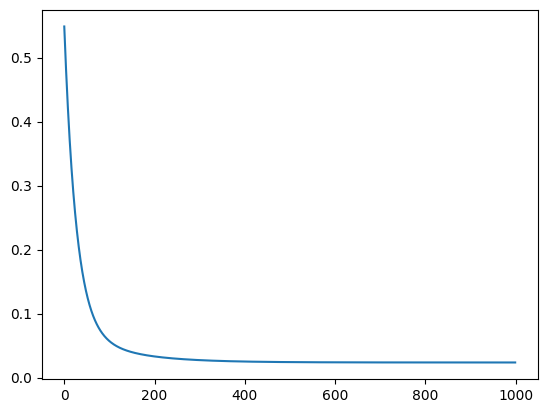

In [10]:
beta = torch.tensor([[0.1], [-0.035], [0.12]], requires_grad=True)

lr = 0.01
epochs = 1000

# loss값을 담을 리스트
history = []

for epoch in range(epochs):
    Y_pred = predict(X, beta)
    loss = mse_loss(Y, Y_pred)
    beta.grad = None

    loss.backward()
    beta.data -= lr * beta.grad
    history.append(loss.item())

plt.plot(history)
plt.show()

## Problem 3:

You are given the cubic equation:

$x^3-6x^2+11x-6=0$.

Use gradient descent to find all the real solutions to this equation.

### Hint:

* It might be helpful to draw the graph of
$y=x^3-6x^2+11x-6$.

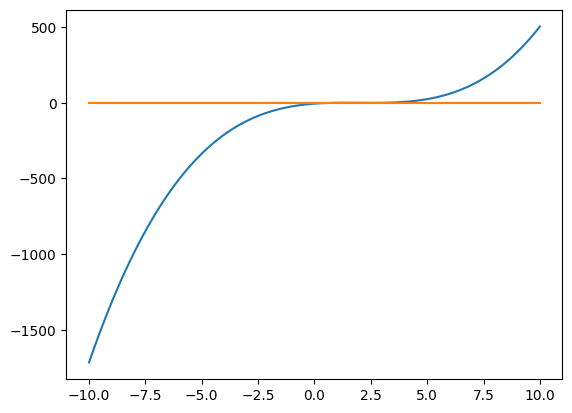

In [12]:
X = np.linspace(-10, 10, 100) # -10부터 10까지 일정 간격으로 100개의 데이터 생성
Y = X**3 - 6*X**2 + 11*X - 6

# 함수 그래프와 y=0 그래프를 함께 그린다
# 방정식의 근이 어떤 특징이 있는지 확인
plt.plot(X, Y)
plt.plot(X, np.zeros(len(X)))
plt.show()

- $x^3-6x^2+11x-6=0$의 해에서 기울기가 0인 것을 알 수 있다.

In [13]:
X = torch.tensor([0.0], requires_grad = True)

def func(x):
    return x**3 - 6*x**2 + 11*x -6

def mse_loss(y):
    return (y-0)**2

lr = 0.001
epochs = 1000
x_list = []
loss_list = []

# 적절한 반복값을 찾기 위해 while문 사용
while True:
    y = func(X)
    loss = mse_loss(y)

    x_list.append(X.item())
    loss_list.append(loss.item())

    X.grad = None # grad 값이 누적되지 않게 비워준다
    loss.backward()
    X.data -= lr * X.grad # X값 업데이트

    epochs -= 1

    # 적절한 반복값을 찾는 기준: 기울기 변화가 0.001 미만 -> 더 이상 반복해도 큰 변화가 없을 것으로 판단
    # 지정한 epoch만큼 반복하거나, 기울기 변화가 0.001 미만일 경우 반복을 종료한다.
    if (epochs == 0) or np.all(np.abs(X.grad.numpy()) < 0.001):
        break

x_list.append(X.item())
loss_list.append(loss.item())

history = pd.DataFrame()
history['x'] = x_list
history['loss'] = loss_list

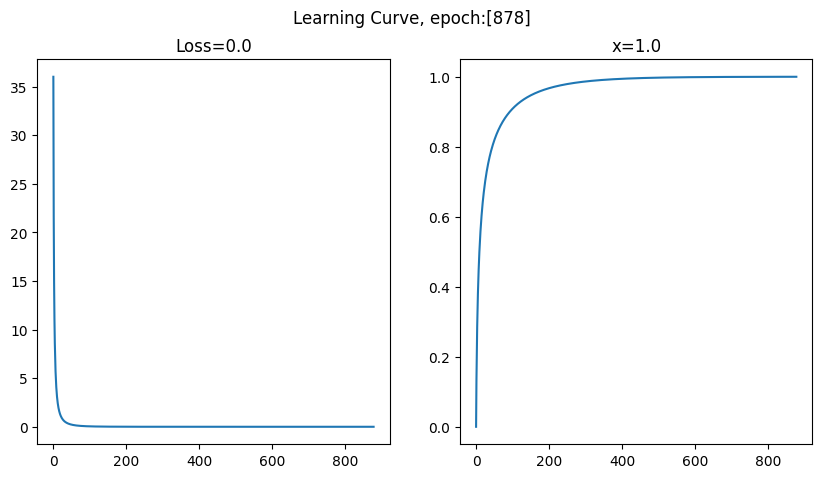

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), squeeze=False)
plt.suptitle(f'Learning Curve, epoch:[{len(history)}]')

axs[0,0].plot(history['loss'])
axs[0,0].set_title(f'Loss={round(history.iloc[-1,1], 3)}')

axs[0,1].plot(history['x'])
axs[0,1].set_title(f'x={round(history.iloc[-1,0], 3)}')

plt.show()

## Problem 4:

You are given
$X \sim {\rm Gamma}({\rm shape}=2.0, {\rm rate}=1.3)   $.

Answer the following questions.

1. Find $x_0=\widehat{x}_0$ such that $P(X<x_0)=0.95$. Note that $x_0$ is called as the 95-th quantile of ${\rm Gamma}({\rm shape}=2.0, {\rm rate}=1.3)$.

2. Confirm that your answer in part 1 is correct by calculating
$P(X<\widehat{x}_0)$.

3. Calculate $E[X^3]$ by simulating 10000 samples of $X$.

### Hint 1:

You may use the following loss function

$L(x_0) = \left(P(X<x_0)-0.95\right)^2$.

### Hint 2:

You may use
`torch.distributions.Gamma` in PyTorch to solve the problem.
In this hint, we explore how to use `torch.distributions.Gamma` in PyTorch to:
1. Define a Gamma distribution.
2. Compute the Cumulative Distribution Function (CDF) for a given value.
3. Simulate random samples from the Gamma distribution.



### Step 1: Defining a Gamma Distribution

The Gamma distribution is defined by two parameters: **shape** and **rate** (which is the inverse of the scale). You can define a Gamma distribution using `torch.distributions.Gamma`.

Let's create a Gamma distribution with `shape = 2.0` and `rate = 1.3`:


In [17]:
# Define the parameters for the Gamma distribution
shape = 2.0
rate = 1.3

# Create a Gamma distribution object
gamma_dist = torch.distributions.Gamma(torch.tensor([shape]), torch.tensor([1/rate]))

# Print the Gamma distribution
print(gamma_dist)

Gamma(concentration: tensor([2.]), rate: tensor([0.7692]))


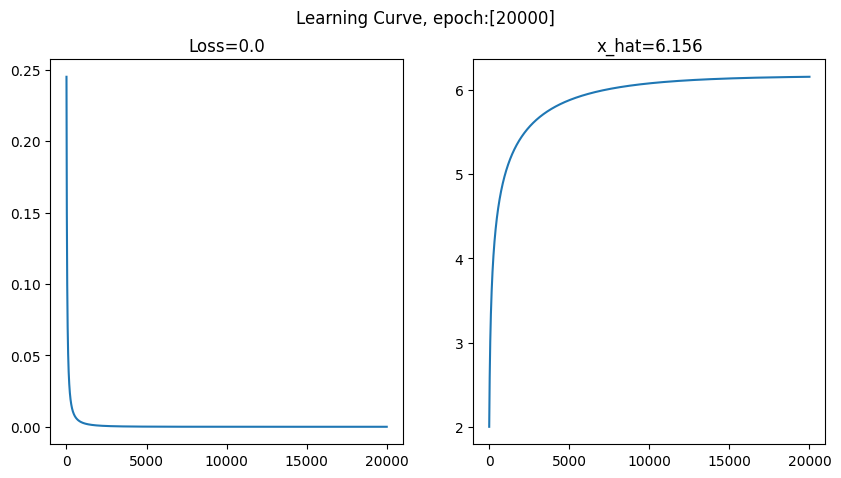

In [19]:
# 1. caculate 95% quantile
def mse_loss(x):
    return (0.95-gamma_dist.cdf(x))**2

x = torch.tensor([2.0], requires_grad=True)
lr = 0.1
epochs = 20000
x_list = []
loss_list = []

# 적절한 반복 횟수를 찾기 위해 while문을 사용
while True:
    loss = mse_loss(x)
    x_list.append(x.item())
    loss_list.append(loss.item())

    x.grad = None
    loss.backward()
    x.data -= lr * x.grad

    epochs -= 1

    # 적절한 반복값을 찾는 기준: 기울기 변화가 0.00001 미만 -> 더 이상 반복해도 큰 변화가 없을 것으로 판단
    # 지정한 epoch만큼 반복하거나, 기울기 변화가 0.00001 미만일 경우 반복을 종료한다.
    if (epochs-1 == 0) or np.all(np.abs(x.grad.numpy()) < 0.00001):
        break

x_list.append(x.item())
loss_list.append(loss.item())

history = pd.DataFrame()
history['x'] = x_list
history['loss'] = loss_list

##########################
# 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 5), squeeze=False)
plt.suptitle(f'Learning Curve, epoch:[{len(history)}]')

axs[0,0].plot(history['loss'])
axs[0,0].set_title(f'Loss={round(history.iloc[-1,1], 3)}')

axs[0,1].plot(history['x'])
axs[0,1].set_title(f'x_hat={round(history.iloc[-1,0], 3)}')

plt.show()


### Step 2: Calculating the CDF

The **Cumulative Distribution Function (CDF)** gives the probability that a random variable is less than or equal to a certain value. In PyTorch, you can calculate the CDF of the Gamma distribution using the `cdf()` method.

Let's calculate the CDF of the Gamma distribution at `θ_0 = 2.0`:


In [20]:
# Define the value at which to compute the CDF
theta_0 = torch.tensor([2.0])

# Calculate the CDF of the Gamma distribution at theta_0
cdf_value = gamma_dist.cdf(theta_0)

# Print the result
print(f"CDF at theta_0 = 2.0: {cdf_value.item()}")

CDF at theta_0 = 2.0: 0.45496392250061035


In [21]:
# 2. calculate P(X<x_hat)
gamma_dist.cdf(torch.tensor(history.iloc[-1,0]))

tensor([0.9496])

- 약간의 오차가 있다. 오차가 0.1% 미만이므로 거의 가까운 값을 찾았다고 할 수 있다.

### Step 3: Simulating Random Samples

You can generate random samples from the Gamma distribution using the `sample()` method. This is useful for simulations or drawing values from the distribution.

Let's simulate 5 random samples from the Gamma distribution:


In [29]:
# Generate 5 random samples from the Gamma distribution
samples = gamma_dist.sample((5,))

# Print the samples
print(f"Random samples: {samples}")

Random samples: tensor([[3.4500],
        [5.6871],
        [3.3620],
        [1.8831],
        [4.6098]])


In [23]:
# 3. calculate E[X^3]
X = gamma_dist.sample((10000,))
E3 = torch.mean(X**3)
E3

tensor(52.8968)

## Problem 5:

You are given
$X \sim {\rm Exp}({\rm mean}=2.0)   $.

Answer the following questions.

1. Find $x_0=\widehat{x}_0$ such that $P(X<x_0)=0.90$.

2. Confirm that your answer in part 1 is correct by calculating
$P(X<\widehat{x}_0)$.

3. Calculate $E[X]$ by simulating 10000 samples of $X$.


In [24]:
exp_dist = torch.distributions.Exponential(torch.tensor([1/(2.0)]))

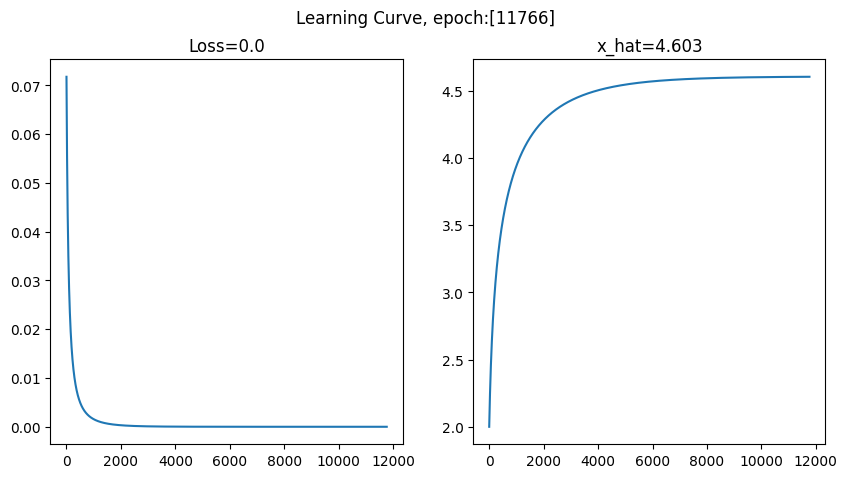

In [26]:
# 1. calculate 90% quantile
def mse_loss(x):
    return (0.90-exp_dist.cdf(x))**2

x = torch.tensor([2.0], requires_grad=True)
lr = 0.1
epochs = 20000

# x, loss 값을 담을 리스트
x_list = []
loss_list = []

# 적절한 반복 횟수를 찾기 위해 while문을 사용
while True:
    loss = mse_loss(x)
    x_list.append(x.item())
    loss_list.append(loss.item())

    x.grad = None
    loss.backward()
    x.data -= lr * x.grad

    epochs -= 1

    # 적절한 반복값을 찾는 기준: 기울기 변화가 0.00001 미만 -> 더 이상 반복해도 큰 변화가 없을 것으로 판단
    # 지정한 epoch만큼 반복하거나, 기울기 변화가 0.00001 미만일 경우 반복을 종료한다.
    if (epochs-1 == 0) or np.all(np.abs(x.grad.numpy()) < 0.00001):
        break

x_list.append(x.item())
loss_list.append(loss.item())

history = pd.DataFrame()
history['x'] = x_list
history['loss'] = loss_list

##########################
# 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 5), squeeze=False)
plt.suptitle(f'Learning Curve, epoch:[{len(history)}]')

axs[0,0].plot(history['loss'])
axs[0,0].set_title(f'Loss={round(history.iloc[-1,1], 3)}')

axs[0,1].plot(history['x'])
axs[0,1].set_title(f'x_hat={round(history.iloc[-1,0], 3)}')

plt.show()

In [27]:
# 2. calculate P(X<x_hat)
exp_dist.cdf(torch.tensor(history.iloc[-1,0]))

tensor([0.8999])

- 오차 0.01%로 거의 오차가 없다.

In [28]:
# 3. calculate E[X]
X = exp_dist.sample((10000,))
E = torch.mean(X)
E

tensor(1.9603)

- mean = 2.0인 exp. distn.이었기 때문에, sampling을 통해 구한 $E[X]$값이 이론 상의 평균과 거의 일치한다.